In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
Learn = pd.read_csv('C:/Users/Bernier/Desktop/School/LearnAF.csv')

In [64]:
#Learn = Learn.set_index('Unnamed: 0').T
Learn = Learn.set_index('Unnamed: 0')
Learn.head(5)

,RegionCode,Region,respondent_id,State,gender,age,internet_research,read_1,hear_1,see_1,...,CriticalThinking_Taught,AK_Other,Personality,IorE,ExtrovertTrue,sex,MaleTrue,CR_taught,Style,Styl
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,7,Pacific Coastal,1.076694e+10,Oregon,F,39.0,3,5,5,5,...,Y,Other,8.0,E,True,0.0,False,1,kinstic,4
2,4,Mid-West,1.076601e+10,South Dakota,M,31.0,5,4,2,4,...,Y,Other,6.0,I,False,1.0,True,1,kinstic,4
3,7,Pacific Coastal,1.076385e+10,California,F,24.0,4,5,5,5,...,Y,Other,7.0,E,True,0.0,False,1,hear,3
4,7,Pacific Coastal,1.076322e+10,Washington,M,19.0,3,5,3,4,...,N,Other,9.0,E,True,1.0,True,0,kinstic,4
5,7,Pacific Coastal,1.076321e+10,California,M,21.0,5,5,5,5,...,Y,Other,6.0,I,False,1.0,True,1,hear,3


In [65]:
import scipy
import statsmodels
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [66]:
Learn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 1 to 158
Data columns (total 25 columns):
RegionCode                 141 non-null int64
Region                     141 non-null object
respondent_id              141 non-null float64
State                      141 non-null object
gender                     141 non-null object
age                        141 non-null float64
internet_research          141 non-null int64
read_1                     141 non-null int64
hear_1                     141 non-null int64
see_1                      141 non-null int64
say_1                      141 non-null int64
do_1                       141 non-null int64
Criticalthinking_1         141 non-null int64
groups_1                   141 non-null int64
connections_1              141 non-null int64
CriticalThinking_Taught    141 non-null object
AK_Other                   141 non-null object
Personality                141 non-null float64
IorE                       141 non-null object
Extrovert

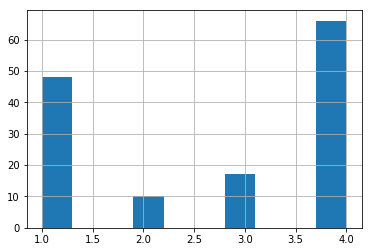

In [67]:
Learn['Styl'].hist()

In [68]:
Learn['Style'].value_counts()

kinstic    66
r/wr       48
hear       17
see        10
Name: Style, dtype: int64

In [69]:
Learn.Styl.describe()

count    141.000000
mean       2.716312
std        1.353969
min        1.000000
25%        1.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Styl, dtype: float64

In [70]:
Learn.Styl.mean()

2.7163120567375887

In [71]:
stats.ttest_1samp(Learn['Styl'], 2.5)

Ttest_1sampResult(statistic=1.8970621816293418, pvalue=0.05987926023876917)

C:\Users\Bernier\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


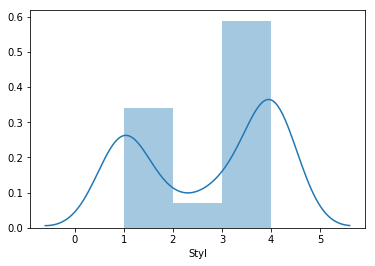

In [72]:
sns.distplot(Learn['Styl'])

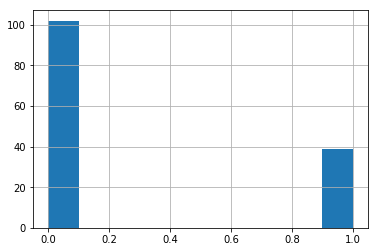

In [73]:
Learn['sex'].hist()

In [74]:
Learn.sex.mean()

0.2765957446808511

In [75]:
stats.ttest_1samp(Learn['sex'], 1)

Ttest_1sampResult(statistic=-19.135146880905985, pvalue=6.705525999740849e-41)

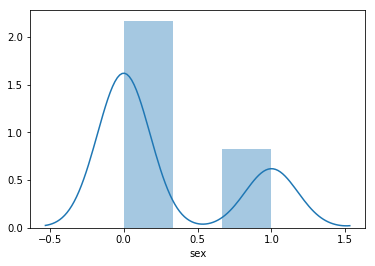

In [76]:
sns.distplot(Learn['sex'])

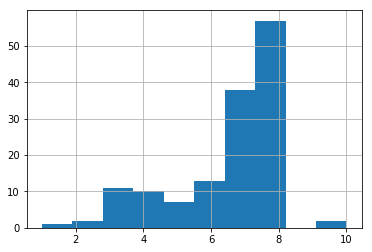

In [77]:
Learn['RegionCode'].hist()

In [78]:
Learn.RegionCode.mean()

6.617021276595745

In [79]:
stats.ttest_1samp(Learn['RegionCode'], 5)

Ttest_1sampResult(statistic=10.741886605893832, pvalue=5.271056454748693e-20)

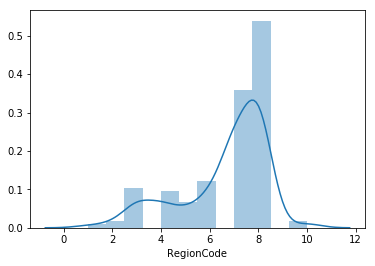

In [80]:
sns.distplot(Learn['RegionCode'])

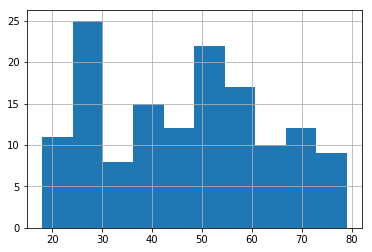

In [81]:
Learn['age'].hist()

In [82]:
Learn.age.mean()

46.46808510638298

In [83]:
stats.ttest_1samp(Learn['age'], 50)

Ttest_1sampResult(statistic=-2.5174436205535065, pvalue=0.012947635791332134)

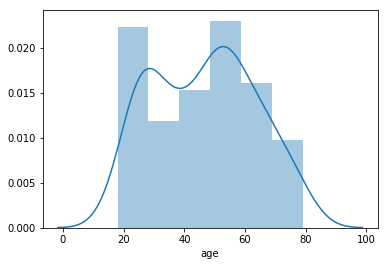

In [84]:
sns.distplot(Learn['age'])

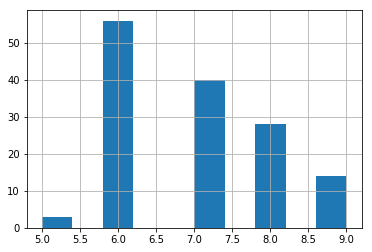

In [85]:
Learn['Personality'].hist()

In [86]:
Learn.Personality.mean()

6.957446808510638

In [87]:
stats.ttest_1samp(Learn['Personality'], 6.5)

Ttest_1sampResult(statistic=5.217439692891753, pvalue=6.400979225888223e-07)

In [88]:
ttest_ind(Learn.Styl[Learn.gender == 'F'], Learn.Styl[Learn.gender == 'M'])

Ttest_indResult(statistic=-1.6885191189840598, pvalue=0.09355385135219867)

In [89]:
ttest_ind(Learn.Styl[Learn.IorE == 'I'], Learn.Styl[Learn.IorE == 'E'])

Ttest_indResult(statistic=-0.9151590617142974, pvalue=0.36169300607713384)

In [90]:
ttest_ind(Learn.Styl[Learn.AK_Other == 'AK'], Learn.Styl[Learn.AK_Other == 'Other'])

Ttest_indResult(statistic=-0.992315975449024, pvalue=0.3227676875467308)

In [91]:
LearnGS = pd.crosstab(Learn['gender'], Learn['Style'])
LearnGS

Style,hear,kinstic,r/wr,see
gender,,,,
F,13,43,38,8
M,4,23,10,2


In [92]:
stats.ttest_rel(Learn['sex'], Learn['Styl'])

Ttest_relResult(statistic=-21.228097892583094, pvalue=1.3263863400288271e-45)

In [93]:
ttest_ind(Learn.Styl[Learn.gender == 'F'], Learn.Styl[Learn.gender == 'M'])

Ttest_indResult(statistic=-1.6885191189840598, pvalue=0.09355385135219867)

In [94]:
stats.chi2_contingency(LearnGS)

(3.26066030278833,
 0.3531556359014151,
 3,
 array([[12.29787234, 47.74468085, 34.72340426,  7.23404255],
        [ 4.70212766, 18.25531915, 13.27659574,  2.76595745]]))

In [95]:
LearnIES = pd.crosstab(Learn['IorE'], Learn['Style'])
LearnIES

Style,hear,kinstic,r/wr,see
IorE,,,,
E,13,40,27,2
I,4,26,21,8


In [96]:
stats.ttest_rel(Learn['Personality'], Learn['Styl'])

Ttest_relResult(statistic=29.292717144168677, pvalue=1.4070820881497472e-61)

In [97]:
ttest_ind(Learn.Styl[Learn.IorE == 'I'], Learn.Styl[Learn.IorE == 'E'])

Ttest_indResult(statistic=-0.9151590617142974, pvalue=0.36169300607713384)

In [98]:
stats.chi2_contingency(LearnIES)

(8.560407870070499,
 0.03574413934027979,
 3,
 array([[ 9.88652482, 38.38297872, 27.91489362,  5.81560284],
        [ 7.11347518, 27.61702128, 20.08510638,  4.18439716]]))

In [99]:
LearnAKOS = pd.crosstab(Learn['AK_Other'], Learn['Style'])
LearnAKOS

Style,hear,kinstic,r/wr,see
AK_Other,,,,
AK,8,24,23,2
Other,9,42,25,8


In [100]:
stats.ttest_rel(Learn['RegionCode'], Learn['Styl'])

Ttest_relResult(statistic=20.16552718653069, pvalue=3.0247554302981737e-43)

In [101]:
ttest_ind(Learn.Styl[Learn.AK_Other == 'AK'], Learn.Styl[Learn.AK_Other == 'Other'])

Ttest_indResult(statistic=-0.992315975449024, pvalue=0.3227676875467308)

In [102]:
stats.chi2_contingency(LearnAKOS)

(3.6135368082639747,
 0.3063325635108534,
 3,
 array([[ 6.87234043, 26.68085106, 19.40425532,  4.04255319],
        [10.12765957, 39.31914894, 28.59574468,  5.95744681]]))

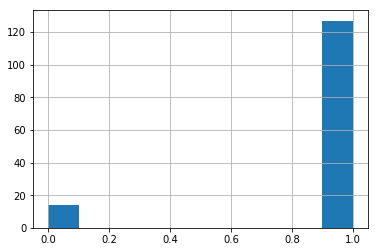

In [103]:
Learn['CR_taught'].hist()

In [104]:
Learn['CriticalThinking_Taught'].value_counts()

Y    127
N     14
Name: CriticalThinking_Taught, dtype: int64

In [105]:
Learn.CR_taught.mean()

0.900709219858156

In [106]:
stats.ttest_1samp(Learn['CR_taught'], .5)

Ttest_1sampResult(statistic=15.854282314773362, pvalue=4.6913782360513985e-33)

In [107]:
sms.DescrStatsW(Learn.CR_taught).tconfint_mean()

(0.8507401554825483, 0.9506782842337637)

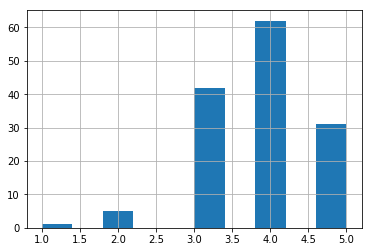

In [108]:
Learn['internet_research'].hist()

In [109]:
Learn.internet_research.mean()

3.8297872340425534

In [110]:
Learn['internet_research'].value_counts()

4    62
3    42
5    31
2     5
1     1
Name: internet_research, dtype: int64

In [111]:
stats.ttest_1samp(Learn['internet_research'], 2.5)

Ttest_1sampResult(statistic=18.881276640151473, pvalue=2.589954197438492e-40)

In [112]:
sms.DescrStatsW(Learn.internet_research).tconfint_mean()

(3.6905455478205864, 3.9690289202645204)

In [113]:
Learn['Styl'].corr(Learn['CR_taught'])

-0.03465745170940435

In [114]:
LearninAgeStyle = Learn[['age', 'Style']]

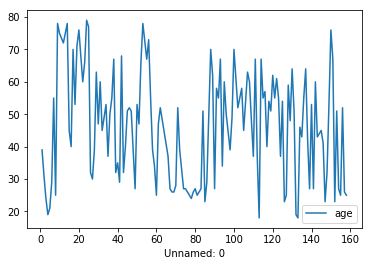

In [115]:
LearninAgeStyle.plot()
plt.show()

In [116]:
LearninSexStyle = Learn[['sex', 'Style']]

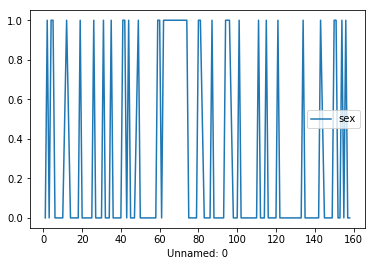

In [117]:
LearninSexStyle.plot()
plt.show()

In [118]:
LearninPersonalityStyle = Learn[['Personality', 'Style']]

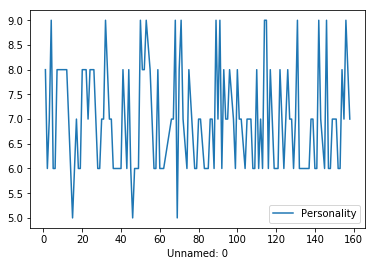

In [119]:
LearninPersonalityStyle.plot()
plt.show()

In [120]:
LearninRegionCodeStyle = Learn[['RegionCode', 'Style']]

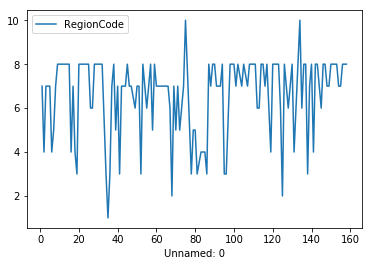

In [121]:
LearninRegionCodeStyle.plot()
plt.show()

In [122]:
LearnDrop = Learn

In [123]:
LearnDrop.drop(['Region', 'respondent_id', 
                        'State','gender','CriticalThinking_Taught', 
                        'AK_Other','IorE','MaleTrue', 'Style'],
             axis=1, inplace=True)
LearnDrop.head()
#LearnDrop.corr(method =' pearson')

,RegionCode,age,internet_research,read_1,hear_1,see_1,say_1,do_1,Criticalthinking_1,groups_1,connections_1,Personality,ExtrovertTrue,sex,CR_taught,Styl
Unnamed: 0,,,,,,,,,,,,,,,,
1,7,39.0,3,5,5,5,5,5,5,5,5,8.0,True,0.0,1,4
2,4,31.0,5,4,2,4,2,5,4,5,5,6.0,False,1.0,1,4
3,7,24.0,4,5,5,5,5,5,3,5,5,7.0,True,0.0,1,3
4,7,19.0,3,5,3,4,3,4,5,4,5,9.0,True,1.0,0,4
5,7,21.0,5,5,5,5,5,5,5,2,4,6.0,False,1.0,1,3


In [125]:
LearnDrop.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,RegionCode,age,internet_research,read_1,hear_1,see_1,say_1,do_1,Criticalthinking_1,groups_1,connections_1,Personality,ExtrovertTrue,sex,CR_taught,Styl
RegionCode,1.0,0.24,-0.18,-0.011,0.11,0.11,0.13,0.13,-0.031,0.064,0.041,0.091,0.044,-0.12,-0.14,-0.051
age,0.24,1.0,-0.36,0.035,0.051,0.06,0.089,-0.029,-0.049,0.013,-0.031,0.17,0.14,-0.13,-0.14,-0.2
internet_research,-0.18,-0.36,1.0,0.13,-0.038,0.029,0.082,0.1,0.32,0.24,0.27,-0.2,-0.21,0.16,0.1,0.096
read_1,-0.011,0.035,0.13,1.0,0.13,0.12,0.041,-0.0022,0.21,0.15,0.24,0.059,0.027,-0.11,0.038,-0.25
hear_1,0.11,0.051,-0.038,0.13,1.0,0.46,0.31,0.29,0.083,0.0016,0.14,0.11,0.2,-0.081,0.074,-0.013
see_1,0.11,0.06,0.029,0.12,0.46,1.0,0.36,0.46,0.012,0.063,0.18,-0.1,-0.1,-0.1,-0.028,0.017
say_1,0.13,0.089,0.082,0.041,0.31,0.36,1.0,0.59,0.23,0.06,0.2,0.048,0.033,-0.011,-0.07,-0.0056
do_1,0.13,-0.029,0.1,-0.0022,0.29,0.46,0.59,1.0,0.21,0.058,0.31,0.055,0.076,0.019,0.081,0.094
Criticalthinking_1,-0.031,-0.049,0.32,0.21,0.083,0.012,0.23,0.21,1.0,0.29,0.39,-0.036,-0.0062,0.041,-0.1,0.05
groups_1,0.064,0.013,0.24,0.15,0.0016,0.063,0.06,0.058,0.29,1.0,0.55,-0.037,-0.11,-0.15,0.18,-0.067


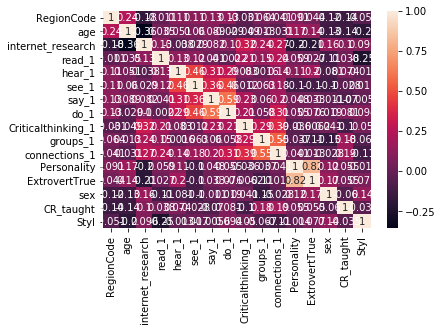

In [126]:
sns.heatmap(LearnDrop.corr(), annot=True)

In [127]:
Learnsas = Learn[['sex','age', 'Styl']]

In [128]:
ATsexStyleA = 'sex ~ C(age) + C(Styl) + C(age): C(Styl)'
model = ols(ATsexStyleA, Learnsas).fit()

In [129]:
aov_tableage = anova_lm(model, typ=3)
aov_tableage

C:\Users\Bernier\Anaconda3\lib\site-packages\statsmodels\base\model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 153, but rank is 58
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
Intercept,2.627274e-30,1.0,1.390138e-29,1.000000
C(age),1.036772e+01,51.0,1.075637e+00,0.396122
C(Styl),8.624299e-01,3.0,1.521091e+00,0.219712
C(age):C(Styl),3.342635e+01,153.0,1.155980e+00,0.297333
Residual,1.001667e+01,53.0,NaN,NaN


In [130]:
#aov_tablesexStyleCR_taught = statsmodels.stats.anova.anova_lm(model, typ=3)
#print(aov_tablesexStyleCR_taught)

In [132]:
LearninA =  Learn[['age','Styl']]
MSAStyleA = ols('age ~ C(Styl)', data=LearninA).fit()
MSAStyleA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     2.916
Date:                Mon, 10 Jun 2019   Prob (F-statistic):             0.0366
Time:                        19:21:52   Log-Likelihood:                -591.83
No. Observations:                 141   AIC:                             1192.
Df Residuals:                     137   BIC:                             1203.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       51.8333      2.357     21.994      0.000      47.173      56.494
C(Styl)[T.2]   -12.2333      5.676     -2.155      0.033     -23.457      -1.010
C(Styl)[T.3]    -6.1275      4.608     -1.330      0.186     -15.240       2.985
C(Styl)[T.4]    -8.0303      3.097     -2.593      0.011     -14.155      -1.906
==============================================================================
Omnibus:                       13.485   Durbin-Watson:                   1.319
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                4.756
Skew:                           0.074   Prob(JB):                       0.0927
Kurtosis:                       2.112   Cond. No.                         5.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

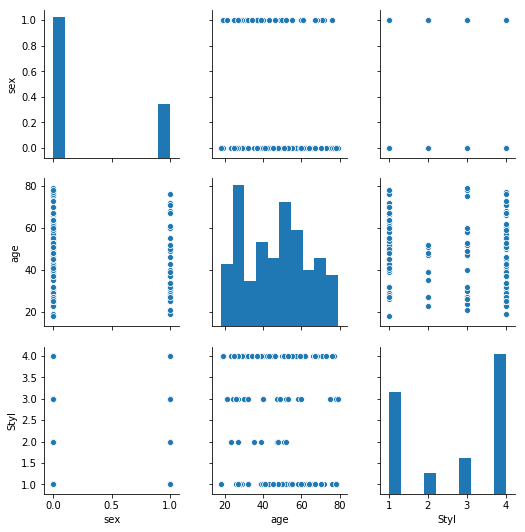

In [133]:
sns.pairplot(Learnsas)

In [134]:
Learnsps = Learn[['sex','Personality', 'Styl']]

In [135]:
ATsexStyleCR_taught = 'sex ~ C(Personality) + C(Styl) + C(Personality): C(Styl)'
model = ols(ATsexStyleCR_taught, Learnsps).fit()

In [136]:
aov_tablePersonality = anova_lm(model, typ=3)
aov_tablePersonality

C:\Users\Bernier\Anaconda3\lib\site-packages\statsmodels\base\model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 11
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
Intercept,1.504945e-31,1.0,7.352974e-31,1.000000
C(Personality),5.015152e-01,4.0,6.125851e-01,0.654348
C(Styl),2.319056e-01,3.0,3.776873e-01,0.769248
C(Personality):C(Styl),1.404892e+00,12.0,5.720106e-01,0.848469
Residual,2.537928e+01,124.0,NaN,NaN


In [137]:
#aov_tablesexStyleCR_taught = statsmodels.stats.anova.anova_lm(model, typ=3)
#print(aov_tablesexStyleCR_taught)

In [139]:
LearninPS =  Learn[['Personality','Styl']]
MSAStyleP = ols('Personality ~ C(Styl)', data=LearninPS).fit()
MSAStyleP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Personality   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.319
Date:                Mon, 10 Jun 2019   Prob (F-statistic):              0.271
Time:                        19:22:31   Log-Likelihood:                -203.24
No. Observations:                 141   AIC:                             414.5
Df Residuals:                     137   BIC:                             426.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.0000      0.150     46.742      0.000       6.704       7.296
C(Styl)[T.2]    -0.5000      0.361     -1.386      0.168      -1.213       0.213
C(Styl)[T.3]     0.2941      0.293      1.004      0.317      -0.285       0.873
C(Styl)[T.4]    -0.0909      0.197     -0.462      0.645      -0.480       0.298
==============================================================================
Omnibus:                        9.792   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                8.701
Skew:                           0.532   Prob(JB):                       0.0129
Kurtosis:                       2.409   Cond. No.                         5.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

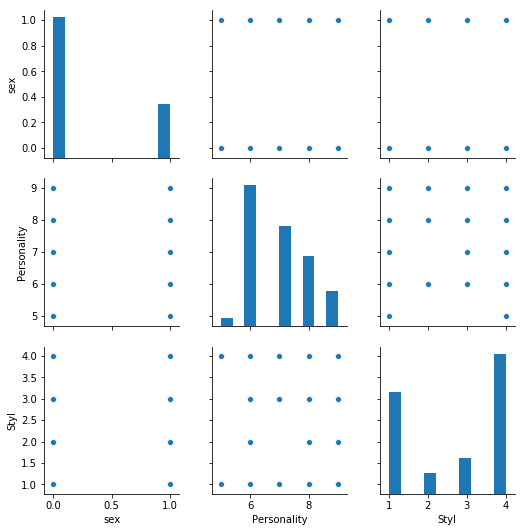

In [140]:
sns.pairplot(Learnsps)

In [141]:
Learnsrcs = Learn[['sex','RegionCode', 'Styl']]

In [142]:
ATsexStyleRC = 'sex ~ C(RegionCode) + C(Styl) + C(RegionCode): C(Styl)'
model = ols(ATsexStyleRC, Learnsrcs).fit()

In [143]:
aov_tableRC = anova_lm(model, typ=3)
aov_tableRC

C:\Users\Bernier\Anaconda3\lib\site-packages\statsmodels\base\model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 16
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
Intercept,0.888829,1.0,4.825337,0.030016
C(RegionCode),1.516968,8.0,1.029428,0.418000
C(Styl),1.468617,3.0,2.657643,0.051571
C(RegionCode):C(Styl),7.027364,24.0,1.589610,0.082094
Residual,21.551449,117.0,NaN,NaN


In [144]:
#aov_tablesexStyleCR_taught = statsmodels.stats.anova.anova_lm(model, typ=3)
#print(aov_tablesexStyleCR_taught)

In [145]:
LearninRC =  Learn[['RegionCode','Styl']]
MSAStyleRC= ols('RegionCode ~ C(Styl)', data=LearninRC).fit()
MSAStyleRC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             RegionCode   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6586
Date:                Mon, 10 Jun 2019   Prob (F-statistic):              0.579
Time:                        19:22:54   Log-Likelihood:                -280.45
No. Observations:                 141   AIC:                             568.9
Df Residuals:                     137   BIC:                             580.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.7292      0.259     25.986      0.000       6.217       7.241
C(Styl)[T.2]    -0.4292      0.624     -0.688      0.493      -1.662       0.804
C(Styl)[T.3]     0.3297      0.506      0.651      0.516      -0.672       1.331
C(Styl)[T.4]    -0.2595      0.340     -0.762      0.447      -0.932       0.414
==============================================================================
Omnibus:                       22.674   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.214
Skew:                          -1.072   Prob(JB):                     7.47e-07
Kurtosis:                       3.452   Cond. No.                         5.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

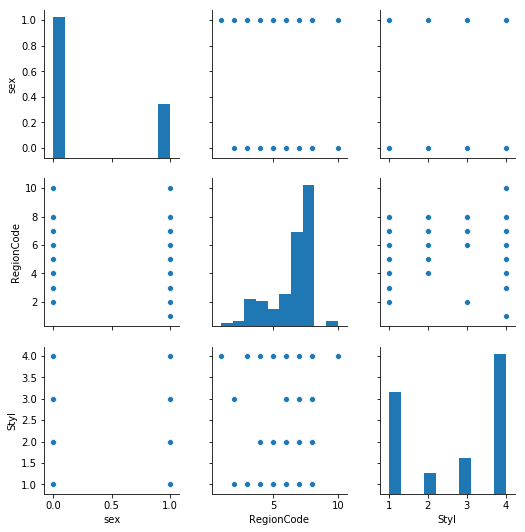

In [146]:
sns.pairplot(Learnsrcs)

In [147]:
Learnsirs = Learn[['sex','internet_research', 'Styl']]

In [148]:
ATsexStyleIR = 'sex ~ C(internet_research) + C(Styl) + C(internet_research): C(Styl)'
model = ols(ATsexStyleIR, Learnsirs).fit()

In [149]:
aov_tableIReserch = anova_lm(model, typ=3)
aov_tableIReserch

C:\Users\Bernier\Anaconda3\lib\site-packages\statsmodels\base\model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 10
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
Intercept,6.519273e-31,1.0,3.202945e-30,1.000000
C(internet_research),7.297386e-01,4.0,8.963088e-01,0.468356
C(Styl),5.725313e-01,3.0,9.376232e-01,0.424668
C(internet_research):C(Styl),1.294255e+00,12.0,5.298940e-01,0.866349
Residual,2.564603e+01,126.0,NaN,NaN


In [269]:
#aov_tablesexStyleCR_taught = statsmodels.stats.anova.anova_lm(model, typ=3)
#print(aov_tablesexStyleCR_taught)

In [151]:
LearninIR =  Learn[['internet_research','Styl']]
MSAStyleIR = ols('internet_research ~ C(Styl)', data=LearninIR).fit()
MSAStyleIR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      internet_research   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.4287
Date:                Mon, 10 Jun 2019   Prob (F-statistic):              0.733
Time:                        19:23:16   Log-Likelihood:                -173.70
No. Observations:                 141   AIC:                             355.4
Df Residuals:                     137   BIC:                             367.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.7292      0.121     30.704      0.000       3.489       3.969
C(Styl)[T.2]     0.0708      0.293      0.242      0.809      -0.508       0.649
C(Styl)[T.3]     0.0944      0.237      0.397      0.692      -0.375       0.564
C(Styl)[T.4]     0.1799      0.160      1.127      0.262      -0.136       0.496
==============================================================================
Omnibus:                        2.845   Durbin-Watson:                   1.700
Prob(Omnibus):                  0.241   Jarque-Bera (JB):                2.759
Skew:                          -0.340   Prob(JB):                        0.252
Kurtosis:                       2.914   Cond. No.                         5.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

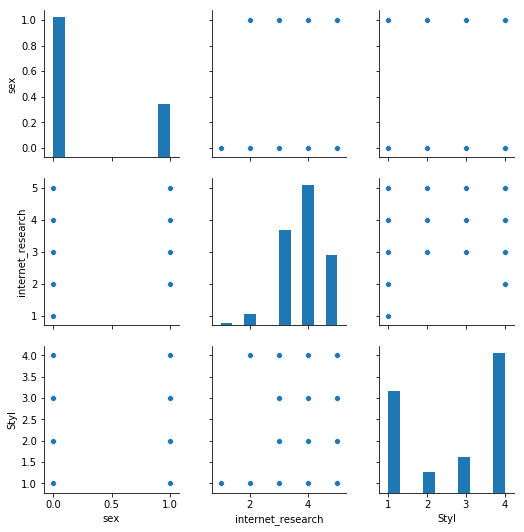

In [152]:
sns.pairplot(Learnsirs)

In [153]:
Learnscrs = Learn[['sex','CR_taught', 'Styl']]

In [154]:
ATsexStyleCR_taught = 'sex ~ C(CR_taught) + C(Styl) + C(CR_taught): C(Styl)'
model = ols(ATsexStyleCR_taught, Learnscrs).fit()

In [155]:
aov_tableCR_taught = anova_lm(model, typ=3)
aov_tableCR_taught

,sum_sq,df,F,PR(>F)
Intercept,0.200000,1.0,0.981968,0.323500
C(CR_taught),0.000388,1.0,0.001903,0.965269
C(Styl),0.414988,3.0,0.679174,0.566265
C(CR_taught):C(Styl),0.197960,3.0,0.323984,0.808016
Residual,27.292141,134.0,NaN,NaN


In [156]:
#aov_tablesexStyleCR_taught = statsmodels.stats.anova.anova_lm(model, typ=3)
#print(aov_tablesexStyleCR_taught)

In [157]:
LearninTS =  Learn[['CR_taught','Styl']]
MSAStyleCR_taught = ols('CR_taught ~ C(Styl)', data=LearninTS).fit()
MSAStyleCR_taught.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CR_taught   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.5842
Date:                Mon, 10 Jun 2019   Prob (F-statistic):              0.626
Time:                        19:23:53   Log-Likelihood:                -28.968
No. Observations:                 141   AIC:                             65.94
Df Residuals:                     137   BIC:                             77.73
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8958      0.044     20.588      0.000       0.810       0.982
C(Styl)[T.2]     0.1042      0.105      0.994      0.322      -0.103       0.311
C(Styl)[T.3]     0.0453      0.085      0.533      0.595      -0.123       0.214
C(Styl)[T.4]    -0.0170      0.057     -0.298      0.766      -0.130       0.096
==============================================================================
Omnibus:                       88.921   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              308.402
Skew:                          -2.622   Prob(JB):                     1.07e-67
Kurtosis:                       7.999   Cond. No.                         5.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

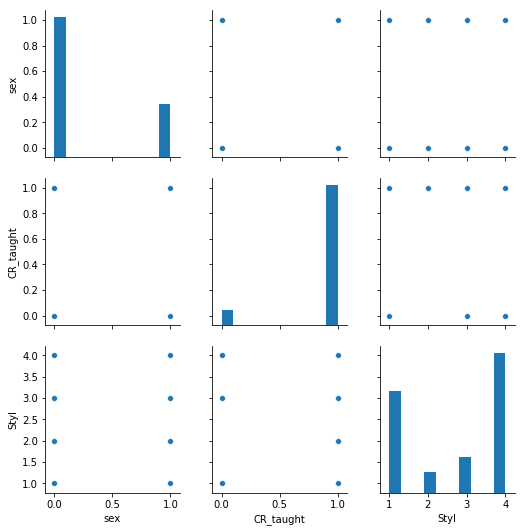

In [158]:
sns.pairplot(Learnscrs)

In [159]:
Learn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 1 to 158
Data columns (total 16 columns):
RegionCode            141 non-null int64
age                   141 non-null float64
internet_research     141 non-null int64
read_1                141 non-null int64
hear_1                141 non-null int64
see_1                 141 non-null int64
say_1                 141 non-null int64
do_1                  141 non-null int64
Criticalthinking_1    141 non-null int64
groups_1              141 non-null int64
connections_1         141 non-null int64
Personality           141 non-null float64
ExtrovertTrue         141 non-null bool
sex                   141 non-null float64
CR_taught             141 non-null int64
Styl                  141 non-null int64
dtypes: bool(1), float64(3), int64(12)
memory usage: 22.8 KB
